Coefficient : [5.83913505 4.59304113]


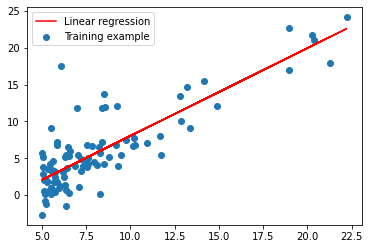

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Function to compute cost function
#Using vectorization to get a better performance instead of for loop
def compute_cost(X, y, theta):
    m = X.shape[0]
    return 1/(2*m) * np.transpose(X@theta - y) @ (X@theta - y)


#main function
if __name__=='__main__':
    data = pd.read_csv('C:/CNTT/DATA/ex1data1.txt', names=['features', 'value'])
    #Features and value
    X = np.array(data.loc[:, 'features']).reshape(-1, 1)
    y = np.array(data.loc[:, 'value'])
    #Features scaling using standardization, you can implement for youself, it's pretty simple
    #
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    #Add column of X0 feature
    X0 = np.ones(X.shape[0]).reshape(-1, 1)
    X_scaled = np.column_stack((X0, X_scaled))
    #Compute coefficient using normal equation
    theta = np.linalg.inv(X_scaled.T@X_scaled)@X_scaled.T@y
    print('Coefficient :',theta)
    predict_y = X_scaled@theta.T
    #plot data
    plt.scatter(X, y, label='Training example')
    plt.plot(X, predict_y, label='Linear regression', color='red')
    plt.legend()
    plt.show()